DATA WRANGLING PROJECT BY UDACITY WHICH AFFORDED BY FWD 

In [248]:
#imprting libraries 
import pandas as pd 
import numpy as np 
import tweepy 
import requests 
import re 
import json 
import time 
import matplotlib.pyplot as plt
import datetime 
import os 
import seaborn as sns 
from scipy import stats 
import warnings

In [249]:
#reading enhanced twitter archive 
df_tw= pd.read_csv('twitter-archive-enhanced.csv')
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [250]:
#reading image prediction file by request
folder_name = 'image_predction_file'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url= ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response = requests.get(url)
with open (os.path.join(folder_name , url.split('/')[-1]),mode= 'wb') as file : 
    file.write(response.content)
    os.listdir(folder_name)    
df_image_pred = pd.read_csv('./image_predction_file/image-predictions.tsv', sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [251]:
#reading file from downloaded json.txt file 
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tw.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.isfile('tweet-json.txt'):
    with open('tweet-json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)
    
#read file into a dataframe:
dicts_ls = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        dict1 = json.loads(line)
        dicts_ls.append(dict1)
twitter_df = pd.DataFrame(dicts_ls)
twitter_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

# 1-Assessment summary 
## 1.1-	Twitter_archive_enhanced .csv read as df_tw 
##### •	`Twitter_id` should be a string value not a int  and don’t duplicated as this column is  a unique value 
##### •	`Time stamp` have incorrect  type string and should be  
##### •	`Doggo`  , `floofer` , `puupper` , `puppo` should be in column which represent the dog age stage (tidy issue ) 
##### • `url_expanded` have missing value .
##### • suggessting to substitue `rating_numerator`, `rating_denominator`  with column called `rating`

## 1.2-	df_image_pred 
##### •	 Tweet_id  also should be a string and unique value 
##### •	 i suggest that `P1_conf , p2_conf , p3_conf  ` substituted by p max which represent highest value of p and take theequivalent value from P  column (
##### •	`P1_dog  , p2_dog , p3`_dog should be one column and if all hav and pe false value  rows , this rows should be deleted (tidy and quality )
##### •	Check `jpg_ul` for duplication and remove this duplication in cleaning 

## 1.3-	Twitter_df 
##### •	Some empty column should be removed like ( `contributors` , `coordinates` )
##### •	 Column ( `in_reply_to_screen_name `, `n_reply_to_status_id `,  `in_reply_to_status_id_str` , `in_reply_to_user_id`,`in_reply_to_user_id_str `)       



$assessing frist dataframe  (archive dataframe = df_tw )$

In [252]:
#disply sample 
df_tw.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1975,672997845381865473,NaN,NaN,2015-12-05 04:36:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenzie. She is a fluff ball. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672997845...,12,10,Kenzie,None,None,None,None
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obi. He got camera shy. 12/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684241637...,12,10,Obi,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
1163,723673163800948736,NaN,NaN,2016-04-23 00:41:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ivar. She is a badass Viking warrior. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723673163...,10,10,Ivar,None,None,None,None
601,798665375516884993,NaN,NaN,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None
1179,719367763014393856,NaN,NaN,2016-04-11 03:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sid &amp; Murphy. Murphy floats alongside...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719367763...,11,10,Sid,None,None,None,None
1231,713177543487135744,NaN,NaN,2016-03-25 01:35:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None


In [253]:
#display information 
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [254]:
#make sure no duplication for this column as this i kay column 
sum(df_tw['tweet_id'].duplicated())

0

In [255]:
#know number of eac dog stage 
list_classification = [df_tw.doggo.value_counts() , df_tw.floofer.value_counts(), df_tw.pupper.value_counts(),df_tw.puppo.value_counts()]
print (list_classification)

[None     2259
doggo      97
Name: doggo, dtype: int64, None       2346
floofer      10
Name: floofer, dtype: int64, None      2099
pupper     257
Name: pupper, dtype: int64, None     2326
puppo      30
Name: puppo, dtype: int64]


In [256]:
list_classification = df_tw[['doggo' , 'floofer', 'pupper','puppo']]
list_classification

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [257]:
#count for each source 
df_tw.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [258]:
#some statics regards to rating values denominator and nominator 
df_tw.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [259]:
df_tw.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [260]:
df_tw.rating_numerator.describe()


count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [261]:
df_tw.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [262]:
#printing text with high denominator values 
print(df_tw.loc[df_tw.rating_denominator == 170, 'text'])
 

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [263]:
#printing text with high numerator  values 
print(df_tw.loc[df_tw.rating_numerator == 1776, 'text']) 

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object


In [264]:
print(df_tw.loc[df_tw.rating_denominator == 0, 'text'])

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object


In [265]:
# df _image information 
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [266]:
df_image_pred.shape 

(2075, 12)

In [267]:
#display sample of df_image_pred 
df_image_pred.sample (20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1334,757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True
1529,789268448748703744,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,1,malamute,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True
1105,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
1438,774314403806253056,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo_dog,0.596045,True,Siberian_husky,0.223067,True,Saluki,0.036325,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,schipperke,0.907559,True,crossword_puzzle,0.017934,False,Chihuahua,0.016191,True
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True


In [268]:
#making sure that no tweets id duplicated 
sum(df_image_pred.tweet_id.duplicated())

0

In [269]:
#some statis analysis regrads to p_conf and as found below tweet_id should be string 
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [270]:
#counting for each number of image 
df_image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [271]:
# make a Data Frame  of p1 , p2 ,p3 
df_name=df_image_pred[['p1','p2','p3']]
df_name 

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


In [272]:
#also make a Data Frame  of p_dog 
df_dog=df_image_pred[['p1_dog','p2_dog','p3_dog']]
df_dog 

,p1_dog,p2_dog,p3_dog
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,False,False,False
7,True,True,False
8,False,False,True
9,True,True,True


In [273]:
#make a dataframe of p_conf and make some static analysis 
df_conf=df_image_pred[['p1_conf','p2_conf','p3_conf']]
df_conf.describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [274]:
#count jpg_url which have  a duplicated value 
sum(df_image_pred.jpg_url.duplicated())

66

### 1.3 Assessing third data frame 

In [275]:
#printing smaple 
twitter_df.sample(50)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
606,None,None,Mon Nov 14 17:03:50 +0000 2016,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 798209828535541760, 'id_str'...",11548,False,This is Cooper. His bow tie was too heavy for ...,None,...,False,NaN,NaN,NaN,2954,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2133,None,None,Fri Nov 27 02:08:07 +0000 2015,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670061499868684291, 'id_str'...",822,False,This is Liam. He has a particular set of skill...,None,...,False,NaN,NaN,NaN,373,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1542,None,None,Tue Jan 19 18:39:13 +0000 2016,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689517477928292354, 'id_str'...",3735,False,This is Carl. He just wants to make sure you'r...,None,...,False,NaN,NaN,NaN,1609,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
787,None,None,Fri Sep 09 18:31:54 +0000 2016,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 774314388044058624, 'id_str'...",24167,True,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,None,...,False,NaN,NaN,NaN,6478,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
661,None,None,Tue Oct 25 18:44:32 +0000 2016,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790987417641750529, 'id_str'...",11089,False,This is Misty. She has a cowboy hat on her nos...,None,...,False,NaN,NaN,NaN,2483,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1965,None,None,Sun Dec 06 03:24:51 +0000 2015,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673342302996340736, 'id_str'...",1362,False,This is Django. He's a skilled assassin pupper...,None,...,False,NaN,NaN,NaN,649,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1072,None,None,Mon Jun 06 15:40:26 +0000 2016,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 739844395122450432, 'id_str'...",4138,False,This is Simba. He's the grand prize. The troph...,None,...,False,NaN,NaN,NaN,966,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1006,None,None,Tue Jun 28 00:54:46 +0000 2016,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747594043354419201, 'id_str'...",4065,False,Again w the sharks guys. This week is about do...,None,...,False,NaN,NaN,NaN,1205,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1926,None,None,Tue Dec 08 01:57:39 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674045131608236033, 'id_str'...",1520,False,Herd of wild dogs here. Not sure what they're ...,None,...,False,NaN,NaN,NaN,710,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1160,None,None,Sat Apr 23 01:41:59 +0000 2016,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 723688327916998657, 'id_str'...",8435,False,This is Reginald. He starts screaming at rando...,None,...,False,NaN,NaN,NaN,3347,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': 

In [276]:
#diplay information 
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [277]:
#statics regards favourite count 
twitter_df[['favorite_count']].describe()

,favorite_count
count,2354.000000
mean,8080.968564
std,11814.771334
min,0.000000
25%,1415.000000
50%,3603.500000
75%,10122.250000
max,132810.000000


In [278]:
#statics regard to retweet_count 
twitter_df[['retweet_count']].describe()

,retweet_count
count,2354.000000
mean,3164.797366
std,5284.770364
min,0.000000
25%,624.500000
50%,1473.500000
75%,3652.000000
max,79515.000000


## 2- Data Cleaning 

In [279]:
# make a copy  from all dataframes 
df_tw_clean = df_tw.copy()
df_image_pred_clean = df_image_pred.copy()
twitter_df_clean = twitter_df.copy()

##### 1- removing the last 6 digit of time stamp and changing format of date and time 

In [280]:
#display column of timestamps 
df_tw_clean[['timestamp']]

,timestamp
0,2017-08-01 16:23:56 +0000
1,2017-08-01 00:17:27 +0000
2,2017-07-31 00:18:03 +0000
3,2017-07-30 15:58:51 +0000
4,2017-07-29 16:00:24 +0000
5,2017-07-29 00:08:17 +0000
6,2017-07-28 16:27:12 +0000
7,2017-07-28 00:22:40 +0000
8,2017-07-27 16:25:51 +0000
9,2017-07-26 15:59:51 +0000


In [281]:
df_tw_clean['timestamp'] = pd.to_datetime(df_tw_clean['timestamp'])
df_tw_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

#### 2- remove expanded url which empty 

In [282]:
#remove expanded url which empty
sum(df_tw_clean['expanded_urls'].isnull())

59

In [283]:
df_tw_clean = df_tw_clean.dropna(how='any', subset=['expanded_urls'])

In [284]:
#test to remove duplicted 
sum(df_tw_clean['expanded_urls'].isnull())

0

In [285]:
#test to check if the row number changed 
df_tw_clean.shape

(2297, 17)

#### 3- remove un-nescessary column 


In [286]:
df_tw_clean = df_tw_clean.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls'], 1)

df_tw_clean

### 2.2- Clean the second data frame 

#### 1- remove duplicaed url

In [287]:
#romve duplicted 
df_image_pred_clean.drop_duplicates( subset ="jpg_url", keep = False  , inplace = True) 

In [288]:
#test 
df_image_pred_clean.shape

(1943, 12)

###### as we the data set was it was 2075 after removeing suplicated it became 1943 

In [289]:
#list of p_dog
df_dog=df_image_pred[['p1_dog','p2_dog','p3_dog']]
df_dog

,p1_dog,p2_dog,p3_dog
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,False,False,False
7,True,True,False
8,False,False,True
9,True,True,True


### 2.3- cleaning third data set 

In [290]:
#display info of twitter_id 
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [291]:
twitter_df_clean = twitter_df_clean.drop(['geo','entities','coordinates','place','contributors','retweeted'],1)

In [292]:
#test 
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 25 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-n

In [293]:
#aslo remove some remaing unuseful column 
twitter_df_clean = twitter_df_clean.drop(columns=['in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_user_id','quoted_status_id'])

In [294]:
#test
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 21 columns):
created_at                       2354 non-null object
display_text_range               2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null object
possibly_sensitive_appealable    2211 non-null object
quoted_status                    28 non-null object
quoted_status_id_str             29 non-null object
retweet_count                    2354 non-n

## Merging  the 3 dataset 

In [295]:
#merge the firt and second 
df_master1  = pd.merge(df_tw_clean, df_image_pred_clean, how = 'left', on = ['tweet_id'])

In [296]:
#test 
df_master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 21 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
text                  2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
jpg_url               1943 non-null object
img_num               1943 non-null float64
p1                    1943 non-null object
p1_conf               1943 non-null float64
p1_dog                1943 non-null object
p2                    1943 non-null object
p2_conf               1943 non-null float64
p2_dog                1943 non-null object
p3                    1943 non-null object
p3_conf               1943 non-null float64
p3_dog                19

In [297]:
#final merge 
twitter_df_clean = twitter_df_clean.rename(columns={'id': 'tweet_id'})
df_master  = pd.merge(df_master1, twitter_df_clean , on = ['tweet_id'])

In [298]:
#test
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2294
Data columns (total 41 columns):
tweet_id                         2295 non-null int64
timestamp                        2295 non-null datetime64[ns]
text                             2295 non-null object
rating_numerator                 2295 non-null int64
rating_denominator               2295 non-null int64
name                             2295 non-null object
doggo                            2295 non-null object
floofer                          2295 non-null object
pupper                           2295 non-null object
puppo                            2295 non-null object
jpg_url                          1942 non-null object
img_num                          1942 non-null float64
p1                               1942 non-null object
p1_conf                          1942 non-null float64
p1_dog                           1942 non-null object
p2                               1942 non-null object
p2_conf               

### re-assessing   and recleaning Master data

##### changing data type of  tweet_id  to string 

            copying of df_ master  to start  re-assessing and cleaning

In [299]:
df_master_clean = df_master.copy()

In [300]:
#Channing tweet_id to string 
df_master_clean['tweet_id'] = df_master['tweet_id'].astype('str')

test

In [301]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2294
Data columns (total 41 columns):
tweet_id                         2295 non-null int64
timestamp                        2295 non-null datetime64[ns]
text                             2295 non-null object
rating_numerator                 2295 non-null int64
rating_denominator               2295 non-null int64
name                             2295 non-null object
doggo                            2295 non-null object
floofer                          2295 non-null object
pupper                           2295 non-null object
puppo                            2295 non-null object
jpg_url                          1942 non-null object
img_num                          1942 non-null float64
p1                               1942 non-null object
p1_conf                          1942 non-null float64
p1_dog                           1942 non-null object
p2                               1942 non-null object
p2_conf               

In [302]:
#changing the ratin_numerator and rating_denominator to float 
df_master_clean[['rating_numerator', 'rating_denominator']] = df_master_clean[['rating_numerator','rating_denominator']].astype(float)
df_master_clean['rating'] = df_master_clean['rating_numerator']/ df_master_clean['rating_denominator']
df_master_clean['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.2
20      1.3
21      1.4
22      1.3
23      1.3
24      1.2
25      1.3
26      1.3
27      1.3
28      1.2
29      1.3
       ... 
2265    0.2
2266    0.7
2267    0.9
2268    1.1
2269    0.6
2270    0.8
2271    1.0
2272    0.9
2273    0.3
2274    0.5
2275    1.1
2276    1.0
2277    0.1
2278    1.1
2279    0.8
2280    0.9
2281    0.6
2282    1.0
2283    0.9
2284    1.0
2285    0.8
2286    0.9
2287    1.0
2288    0.2
2289    1.0
2290    0.5
2291    0.6
2292    0.9
2293    0.7
2294    0.8
Name: rating, Length: 2295, dtype: float64

In [303]:
#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
dog_type = []
conf = []
def image(df_master_clean):    
    if df_master_clean['p1_dog'] == True:
        dog_type.append(df_master_clean['p1'])
        conf.append(df_master_clean['p1_conf'])
    elif df_master_clean['p2_dog'] == True:
        dog_type.append(df_master_clean['p2'])
        conf.append(df_master_clean['p2_conf'])
    elif df_master_clean['p3_dog'] == True:
        dog_type.append(df_master_clean['p3'])
        conf.append(df_master_clean['p3_conf'])
    else:
        dog_type.append('Error')
        conf.append('Error')
df_master_clean.apply(image, axis=1)

df_master_clean['dog_type'] = dog_type 
df_master_clean['confidence_list'] = conf

In [304]:
#drop which have error 
df_master_clean = df_master_clean[df_master_clean['dog_type'] !='Error']
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 1 to 2294
Data columns (total 44 columns):
tweet_id                         1631 non-null object
timestamp                        1631 non-null datetime64[ns]
text                             1631 non-null object
rating_numerator                 1631 non-null float64
rating_denominator               1631 non-null float64
name                             1631 non-null object
doggo                            1631 non-null object
floofer                          1631 non-null object
pupper                           1631 non-null object
puppo                            1631 non-null object
jpg_url                          1631 non-null object
img_num                          1631 non-null float64
p1                               1631 non-null object
p1_conf                          1631 non-null float64
p1_dog                           1631 non-null object
p2                               1631 non-null object
p2_conf          

In [305]:
df_master_clean  = df_master_clean.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf','p3_conf', 'p1_dog','p2_dog','p3_dog', ], 1)

In [306]:
#test
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 1 to 2294
Data columns (total 35 columns):
tweet_id                         1631 non-null object
timestamp                        1631 non-null datetime64[ns]
text                             1631 non-null object
rating_numerator                 1631 non-null float64
rating_denominator               1631 non-null float64
name                             1631 non-null object
doggo                            1631 non-null object
floofer                          1631 non-null object
pupper                           1631 non-null object
puppo                            1631 non-null object
jpg_url                          1631 non-null object
img_num                          1631 non-null float64
created_at                       1631 non-null object
display_text_range               1631 non-null object
extended_entities                1631 non-null object
favorite_count                   1631 non-null int64
favorited          

In [307]:
df_master_clean  = df_master_clean.drop(['quoted_status', 'quoted_status_id_str', 'retweeted_status', 'rating_denominator','rating_numerator'], 1)

In [308]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 1 to 2294
Data columns (total 30 columns):
tweet_id                         1631 non-null object
timestamp                        1631 non-null datetime64[ns]
text                             1631 non-null object
name                             1631 non-null object
doggo                            1631 non-null object
floofer                          1631 non-null object
pupper                           1631 non-null object
puppo                            1631 non-null object
jpg_url                          1631 non-null object
img_num                          1631 non-null float64
created_at                       1631 non-null object
display_text_range               1631 non-null object
extended_entities                1631 non-null object
favorite_count                   1631 non-null int64
favorited                        1631 non-null bool
full_text                        1631 non-null object
id_str                 

In [309]:
df_master_clean  = df_master_clean.drop(['in_reply_to_status_id_str', 'in_reply_to_user_id_str' ], 1)

In [310]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 1 to 2294
Data columns (total 28 columns):
tweet_id                         1631 non-null object
timestamp                        1631 non-null datetime64[ns]
text                             1631 non-null object
name                             1631 non-null object
doggo                            1631 non-null object
floofer                          1631 non-null object
pupper                           1631 non-null object
puppo                            1631 non-null object
jpg_url                          1631 non-null object
img_num                          1631 non-null float64
created_at                       1631 non-null object
display_text_range               1631 non-null object
extended_entities                1631 non-null object
favorite_count                   1631 non-null int64
favorited                        1631 non-null bool
full_text                        1631 non-null object
id_str                 

## storing data to csv 

In [311]:
#storing data to csv 
df_master_clean.to_csv('twitter_master.csv', index=False, encoding = 'utf-8')

In [312]:
df_master_clean

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,...,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,source,truncated,user,rating,dog_type,confidence_list
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,en,False,False,6514,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,en,False,False,4328,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.2,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,en,False,False,8964,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,en,False,False,9774,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,None,None,None,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,...,en,False,False,3261,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,Jax,None,None,None,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,...,en,False,False,2158,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,None,None,None,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,...,en,False,False,16716,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,Zoey,None,None,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,...,en,False,False,4429,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,Cassie,doggo,None,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,...,en,False,False,7711,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.4,Pembroke,0.511319
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,Koda,None,None,None,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,...,en,False,False,7624,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1.3,Samoyed,0.957979


## visualization and insight data 

###### Counting for each source 

In [313]:
#display trend
df_master_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1601
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       21
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

iPhone  1601 <br>
twitter Web Client 21  <br>
TweetDeck   9   <br>

In [314]:
df_master_clean.doggo.value_counts()

None     1572
doggo      59
Name: doggo, dtype: int64

In [315]:
df_master_clean.floofer.value_counts()

None       1623
floofer       8
Name: floofer, dtype: int64

In [316]:
df_master_clean.pupper.value_counts()

None      1459
pupper     172
Name: pupper, dtype: int64

In [317]:
df_master_clean.puppo.value_counts()

None     1610
puppo      21
Name: puppo, dtype: int64

from above we found that we 
doggo     59  <br>
floofer   8 <br> 
pupper     172 <br>
puppo      21 <br>

In [318]:
names = ['doggo', 'floofer', 'pupper', 'puppo']
values = [59,8,172,21]
df_d = pd.DataFrame(values  ,names )
df_d


,0
doggo,59
floofer,8
pupper,172
puppo,21


In [319]:
df_list= df_master_clean.dog_type.value_counts()
df_list

golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                61
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Shih-Tzu                           20
Staffordshire_bullterrier          20
Cardigan                           19
kuvasz                             19
beagle                             19
Maltese_dog                        19
Rottweiler                         19
Shetland_sheepdog                  19
Italian_greyhound                  17
Lakeland_ter

                    disply top 20  dog_type  most repeated 
                   

In [320]:
df_list[:20]

golden_retriever             143
Labrador_retriever           103
Pembroke                      94
Chihuahua                     87
pug                           61
toy_poodle                    50
chow                          45
Pomeranian                    42
Samoyed                       38
malamute                      32
Chesapeake_Bay_retriever      31
French_bulldog                30
cocker_spaniel                26
miniature_pinscher            24
Eskimo_dog                    22
German_shepherd               21
Siberian_husky                20
Shih-Tzu                      20
Staffordshire_bullterrier     20
Cardigan                      19
Name: dog_type, dtype: int64

            grouping the data set by rating and disply the tail  and head of the table 

In [321]:
df_dog_type_count = df_master_clean.groupby('rating').count()
df_dog_type_count.tail()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,...,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,source,truncated,user,dog_type,confidence_list
rating,,,,,,,,,,,,,,,,,,,,,
1.400000,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2.600000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2.700000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3.428571,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7.500000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [322]:
df_dog_type_count.head()

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,jpg_url,img_num,...,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,source,truncated,user,dog_type,confidence_list
rating,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0.2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
0.3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
0.4,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
0.5,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [323]:
col_list = list(df_master_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'text', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'created_at', 'display_text_range', 'extended_entities', 'favorite_count', 'favorited', 'full_text', 'id_str', 'is_quote_status', 'lang', 'possibly_sensitive', 'possibly_sensitive_appealable', 'retweet_count', 'source', 'truncated', 'user', 'rating', 'dog_type', 'confidence_list']


                                      sorting dataset by Favourit _count 

In [324]:
df_master_sorted = df_master_clean.sort_values(by = 'favorite_count', ascending = False).head(5)
df_master_sorted[['favorite_count','pupper', 'floofer','doggo','puppo']]

,favorite_count,pupper,floofer,doggo,puppo
390,132810,None,None,None,puppo
1003,131075,None,None,doggo,None
62,107956,None,None,None,None
130,106827,pupper,None,None,None
110,85011,None,None,None,None


In [325]:
df_master_clean['timestamp'].min()

Timestamp('2015-11-15 22:32:08')

In [326]:
df_master_clean['timestamp'].max() 

Timestamp('2017-08-01 00:17:27')

In [327]:
 df_datestamp = df_master_clean['timestamp'].max() -  df_master_clean['timestamp'].min()
df_datestamp 

Timedelta('624 days 01:45:19')

#### What is the most retweeted tweet to date? 

In [328]:
df_master_sorted_2 = df_master_clean.sort_values(by = 'retweet_count', ascending = False).head()
df_master_sorted_2[['retweet_count','pupper', 'floofer','doggo','puppo']]

,retweet_count,pupper,floofer,doggo,puppo
1003,79515,None,None,doggo,None
1043,52360,None,None,doggo,None
390,48265,None,None,None,puppo
62,45849,None,None,None,None
130,32883,pupper,None,None,None


In [329]:
df_master_sorted_2 = df_master_clean.sort_values(by = 'retweet_count', ascending = False).head()
df_master_sorted_2[['retweet_count','dog_type']]

,retweet_count,dog_type
1003,79515,Labrador_retriever
1043,52360,Eskimo_dog
390,48265,Lakeland_terrier
62,45849,English_springer
130,32883,French_bulldog


In [330]:
df_master_sorted_2 = df_master_clean.sort_values(by = 'retweet_count', ascending = False).head()
df_master_sorted_2[['favorite_count','dog_type']]

,favorite_count,dog_type
1003,131075,Labrador_retriever
1043,75163,Eskimo_dog
390,132810,Lakeland_terrier
62,107956,English_springer
130,106827,French_bulldog


In [331]:
df_master_sorted_2 = df_master_clean.sort_values(by = 'retweet_count', ascending = False).head(1)
df_master_sorted_2[['text']]

,text
1003,Here's a doggo realizing you can stand in a po...


In [332]:
df_master_sorted_2 = df_master_clean.sort_values(by = 'retweet_count', ascending = False).head()
df_master_sorted_2[['img_num','retweet_count','favorite_count']]

,img_num,retweet_count,favorite_count
1003,1.0,79515,131075
1043,1.0,52360,75163
390,1.0,48265,132810
62,1.0,45849,107956
130,2.0,32883,106827


In [333]:
df_master_sorted_2 = df_master_clean.sort_values(by = 'retweet_count', ascending = False).head(1)
df_master_sorted_2[['retweet_count','text']]

,retweet_count,text
1003,79515,Here's a doggo realizing you can stand in a po...


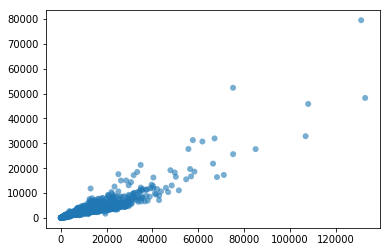

In [334]:
plt.scatter(df_master_clean['favorite_count'], df_master_clean['retweet_count'], edgecolor = 'None', alpha = 0.6)

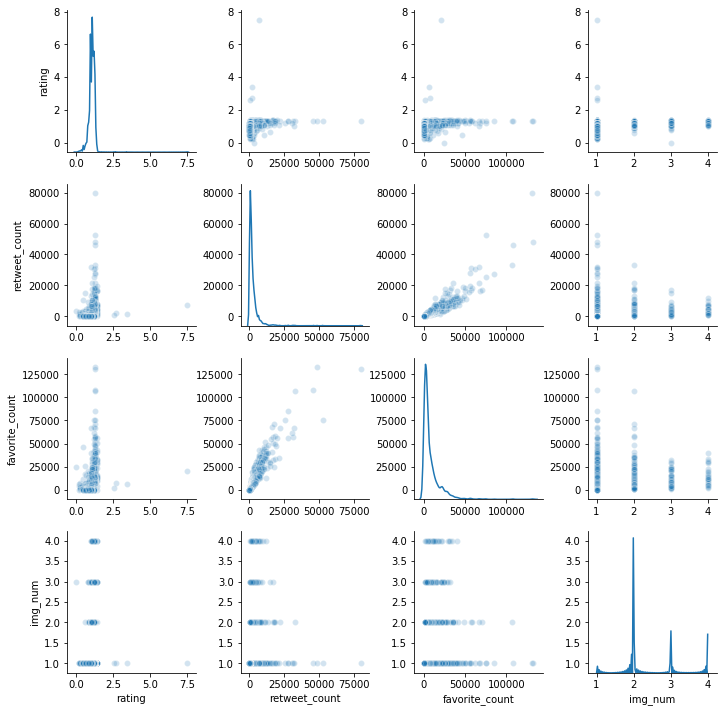

In [335]:
sns.pairplot(df_master_clean,
             vars = ['rating','retweet_count', 'favorite_count', 'img_num'] 
            , diag_kind = 'kde', plot_kws = {'alpha': 0.2});

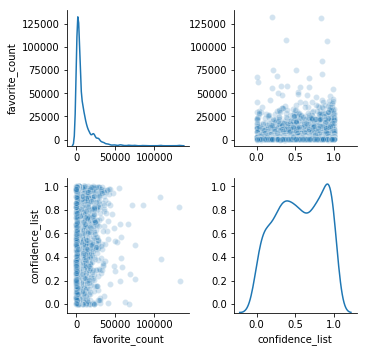

In [336]:
sns.pairplot(df_master_clean,
             vars = [ 'favorite_count', 'confidence_list'] 
            , diag_kind = 'kde', plot_kws = {'alpha': 0.2});

<Container object of 1631 artists>

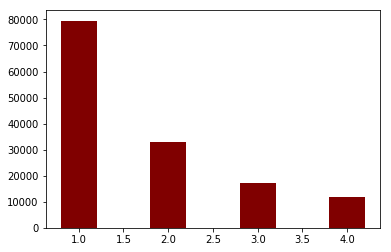

In [337]:
plt.bar(df_master_clean['img_num'], df_master_clean['retweet_count'], color ='maroon',  
        width = 0.4) 

<Container object of 1631 artists>

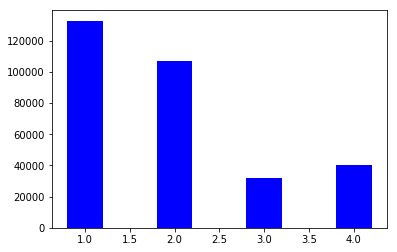

In [338]:
plt.bar(df_master_clean['img_num'], df_master_clean['favorite_count'], color ='blue',  
        width = 0.4) 

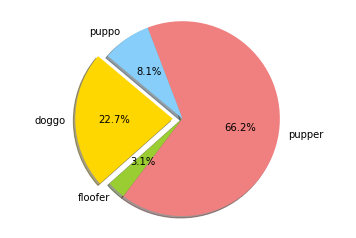

In [339]:
names = ['doggo', 'floofer', 'pupper', 'puppo']
values = [59,8,172,21]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(values, explode=explode, labels=names , colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()